<a href="https://colab.research.google.com/github/shubh8794/Meesho_sql_assignment/blob/master/Meesho_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the Given Data - order_details, orders & products. 

The Data are linked as follows

       Id in orders is OrderId in order_details.
      Id in products is productId in order_details.

For this Data 

Find out the GMV(Order Total) per Product

Plot a graph of No. of Orders v/s Product Price 


In [0]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect(':memory:')
dfs = pd.read_excel('Q1 (1).xlsx', sheet_name=None)
for table, df in dfs.items():
    df.to_sql(table, db)

In [0]:
def run_query(query):
  return pd.read_sql_query(query,db)

In [77]:
query = 'SELECT * FROM orders LIMIT 5;'
run_query(query)

,index,id,userId,total,created
0,0,194,330,4760,2017-03-01 14:22:30
1,1,201,142,10395,2017-03-01 16:41:53
2,2,208,324,10395,2017-03-01 21:51:09
3,3,215,258,4165,2017-03-02 08:22:00
4,4,222,232,2940,2017-03-02 11:51:57


In [78]:
query = 'SELECT * FROM order_details LIMIT 5;'
run_query(query)

,index,id,order_id,product_id,quantity,price
0,0,248,194,180,1,4624
1,1,265,208,844,1,3366
2,2,267,208,834,1,3366
3,3,346,264,1079,1,5814
4,4,370,285,1419,1,4046


In [79]:
query = 'SELECT * FROM products LIMIT 5;'
run_query(query)

,index,id,name,created
0,0,142,Multicolored Kurti ( 115K ),2017-02-16 15:11:37
1,1,168,Multicolored Scarf ( Jute Scarf ),2017-02-16 16:24:11
2,2,190,Jute Scarf,2017-02-17 11:11:19
3,3,146,Multicolored Kurti ( 115K ),2017-02-16 15:11:42
4,4,148,Multicolored Kurti ( 115K ),2017-02-16 15:11:44


In [80]:
query = '''SELECT p.name,  sum(orders.total) as GMV 
FROM order_details od 
LEFT JOIN orders 
on od.order_id = orders.id
LEFT JOIN products p 
on od.product_id = p.id 
group by p.name;'''
run_query(query)

,name,GMV
0,10 Grams Ganesh-Lakshmi-Saraswati 999 Purity ...,3220
1,3 IN 1 Stand for Kitchen,3360
2,6 Pocket Large Clear Purse Handbag Hanging St...,2142
3,Best for Cough & Cold Streamer & Vaporizer (...,3122
4,Designer Alloy Saree Brooch,3395
5,Designer Butterfly Inspired Saree Brooch,6986
6,Designer Chenile carpet,5810
7,Designer Floral Alloy Saree Brooch,3220
8,Designer Fog Fountaion,12572
9,Designer Georgette & Jacquard Saree,4193


In [81]:
query = '''SELECT p.name, sum(od.quantity) as order_numbers, od.price 
FROM order_details od 
LEFT JOIN products p 
on od.product_id = p.id 
group by p.name;'''
q1_ans2_df = run_query(query)
q1_ans2_df.head()

,name,order_numbers,price
0,10 Grams Ganesh-Lakshmi-Saraswati 999 Purity ...,4,3128
1,3 IN 1 Stand for Kitchen,2,1632
2,6 Pocket Large Clear Purse Handbag Hanging St...,1,2081
3,Best for Cough & Cold Streamer & Vaporizer (...,2,1516
4,Designer Alloy Saree Brooch,2,1156


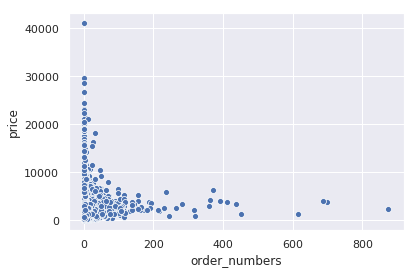

In [82]:
 import seaborn as sns; sns.set()
 sns.scatterplot(x="order_numbers", y="price", data=q1_ans2_df)

Q2) Given an Order Table with the schema(id, user_id, total, created). 

Write a SQL Query to create a retention plot. The format for the raw data and output are given. 

Week Start Date is the 1st Week in which the User_Id Placed the order,  Week 0 is Unique User ids who placed their 1st Order in this week.

Out of those ids, Week 1 is unique users who placed an order in 1st Week + 1, Then Week 2 is 1st Week + 2 and so on till Week 10.



In [3]:
db2 = sqlite3.connect(':memory:')
dfs = pd.read_excel('Q2 (3).xlsx', sheet_name=None)
for table, df2 in dfs.items():
    df2.to_sql(table, db2)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [0]:
def run_query2(query):
  return pd.read_sql_query(query,db2)

In [85]:
query = 'select * from Sheet1 limit 5;'
run_query2(query)

,index,id,userId,total,created
0,0,194,330,4760,2017-03-01 14:22:30
1,1,201,142,10395,2017-03-01 16:41:53
2,2,208,324,10395,2017-03-01 21:51:09
3,3,215,258,4165,2017-03-02 08:22:00
4,4,222,232,2940,2017-03-02 11:51:57


In [97]:
query = '''SELECT id, userId,
  DATE(created) AS created_at
FROM Sheet1 ;'''
run_query2(query)


,id,userId,created_at
0,194,330,2017-03-01
1,201,142,2017-03-01
2,208,324,2017-03-01
3,215,258,2017-03-02
4,222,232,2017-03-02
5,229,157,2017-03-02
6,236,189,2017-03-02
7,243,57,2017-03-03
8,250,257,2017-03-03
9,257,95,2017-03-03


Q3) Given the tables Order_Timeline(schema id,order_id,  message, created) & Order_Shipment  Table(schema id, order_id,actual_dispatch_date,created) ,

write a SQL Query to find

1. % orders shipped before first message date(OTIF)
2. % orders shipped on first message date+1(OTIF+1)
3. % orders shipped on first message date+2(OTIF+2)
4. %orders shipped after that(OTIF+>2)

Order_Timeline contains the message for expected dispatch date, Order_shipment gives you the real dispatch date. They are combined using order_id.


In [0]:
db3 = sqlite3.connect(':memory:')
dfs3 = pd.read_excel('Q3 (5).xlsx', sheet_name=None)
for table, df3 in dfs3.items():
    df3.to_sql(table, db3)

In [0]:
def run_query3(query):
  return pd.read_sql_query(query,db3)

In [6]:
query = 'select * from order_timeline limit 5;'
run_query3(query)


,index,id,order_id,message,created
0,0,14,1609,"{""dispatch_date"":""2017-03-31""}",2017-03-27 14:12:07
1,1,31,1690,"{""dispatch_date"":""2017-03-31""}",2017-03-27 14:44:48
2,2,55,1723,"{""dispatch_date"":""2017-03-31""}",2017-03-27 15:58:28
3,3,105,1669,"{""dispatch_date"":""2017-04-01""}",2017-03-27 16:32:53
4,4,138,1749,"{""dispatch_date"":""2017-03-31""}",2017-03-27 18:31:40


In [7]:
query = 'select * from order_shipment limit 5;'
run_query3(query)

,index,id,order_id,actual_dispatch_date
0,0,1514,1514,2017-03-28 00:00:00
1,1,1669,1669,2017-03-29 00:00:00
2,2,1723,1723,2017-03-27 00:00:00
3,3,1772,1772,2017-03-28 00:00:00
4,4,1880,1880,2017-03-30 00:00:00


In [8]:
# query = '''
# SELECT count(*) as total from (Select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
# inner join order_shipment os
# on ot.order_id = os.order_id where dispatch_date != "None");'''
# run_query3(query)

,total
0,27720


In [33]:
query = '''
select ROUND(CAST((m.OTIF * 100.0 / total) AS FLOAT), 2) as OTIF, ROUND(CAST((m.OTIF1 * 100.0 / total) AS FLOAT), 2) as OTIF1, ROUND(CAST((m.OTIF2 * 100.0 / total) AS FLOAT), 2) as OTIF2, ROUND(CAST((m.OTIF3 * 100.0 / total) AS FLOAT), 2) as OTIF3 FROM 
(select a.OTIF, b.OTIF1, c.OTIF2, d.OTIF3, e.total FROM
(SELECT count(*) as total from (Select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
inner join order_shipment os
on ot.order_id = os.order_id where dispatch_date != "None")) as e
inner join 
(Select count(*) as OTIF FROM (Select * FROM (select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
inner join order_shipment os
on ot.order_id = os.order_id where dispatch_date != "None") as x
where x.message_date >= x.dispatch_date) as y) as a
inner join
(Select count(*) as OTIF1 FROM (Select * FROM (select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
inner join order_shipment os
on ot.order_id = os.order_id where dispatch_date != "None") as x
where x.dispatch_date = date(x.message_date, '+1 day')) as z) as b
inner join
(Select count(*) as OTIF2 FROM (Select * FROM (select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
inner join order_shipment os
on ot.order_id = os.order_id where dispatch_date != "None") as x
where x.dispatch_date = date(x.message_date, '+2 day')) as z) as c
inner join 
(Select count(*) as OTIF3 FROM (Select * FROM (select ot.order_id,  JSON_EXTRACT(ot.message,'$.dispatch_date') as message_date, DATE(os.actual_dispatch_date) As dispatch_date from order_timeline ot
inner join order_shipment os
on ot.order_id = os.order_id where dispatch_date != "None") as x
where x.dispatch_date > date(x.message_date, '+2 day')) as z) as d) as m
;'''
run_query3(query)

,OTIF,OTIF1,OTIF2,OTIF3
0,95.0,1.99,1.15,1.86
